# Auto Encoder Final Project

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [5]:
import tensorflow as tf
import os

In [6]:
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from scipy.ndimage.filters import convolve
from skimage import data, io, filters
import skimage
from skimage.morphology import convex_hull_image, erosion

In [7]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D,\
ZeroPadding2D, Convolution2D, ZeroPadding2D, Conv2DTranspose,ReLU
from keras import models
from keras import layers

In [8]:
# from google.colab import drive
# drive.mount('/drive')

In [9]:
# %cd /drive/MyDrive/Stevens/628WS/satelliteRoads/

In [10]:
# class_dict = './class_dict.csv'
# metadata = './metadata.csv'
# main_path = './'
# validation_data = './valid'

In [11]:
class_dict = './satelliteRoads/class_dict.csv'
metadata = './satelliteRoads/metadata.csv'
main_path = './satelliteRoads/'

In [12]:
class_dict = pd.read_csv(class_dict)
metadata = pd.read_csv(metadata)



In [13]:
class_dict

,name,r,g,b
0,road,255,255,255
1,background,0,0,0


In [14]:
train_metadata = metadata[metadata['split']  == 'train']
test_metadata = metadata[metadata['split'] == 'test']

In [15]:
len(train_metadata)

6226

In [16]:
len(test_metadata)

1101

In [17]:
train_metadata.drop('split', inplace=True, axis=1)

/tmp/ipykernel_190736/2921210069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_metadata.drop('split', inplace=True, axis=1)


In [18]:
test_metadata.drop('split', inplace=True, axis=1)

/tmp/ipykernel_190736/2481226812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_metadata.drop('split', inplace=True, axis=1)


In [19]:
test_metadata.drop('mask_path', inplace=True, axis=1)

/tmp/ipykernel_190736/2436811472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_metadata.drop('mask_path', inplace=True, axis=1)


In [20]:
train_metadata.head()

,image_id,sat_image_path,mask_path
0,100034,train/100034_sat.jpg,train/100034_mask.png
1,100081,train/100081_sat.jpg,train/100081_mask.png
2,100129,train/100129_sat.jpg,train/100129_mask.png
3,100703,train/100703_sat.jpg,train/100703_mask.png
4,100712,train/100712_sat.jpg,train/100712_mask.png


In [21]:
test_metadata.head()

,image_id,sat_image_path
7469,100393,test/100393_sat.jpg
7470,100995,test/100995_sat.jpg
7471,101982,test/101982_sat.jpg
7472,10206,test/10206_sat.jpg
7473,102240,test/102240_sat.jpg


In [22]:
train_metadata = train_metadata.reset_index()
test_metadata = test_metadata.reset_index()

In [23]:
train_metadata["sat_image_path"] = train_metadata["sat_image_path"].apply(lambda sat_path: os.path.join(main_path,sat_path))



In [24]:
train_metadata['mask_path'] = train_metadata['mask_path'].apply(lambda mask_path: os.path.join(main_path, mask_path))


In [25]:
train_metadata

,index,image_id,sat_image_path,mask_path
0,0,100034,./satelliteRoads/train/100034_sat.jpg,./satelliteRoads/train/100034_mask.png
1,1,100081,./satelliteRoads/train/100081_sat.jpg,./satelliteRoads/train/100081_mask.png
2,2,100129,./satelliteRoads/train/100129_sat.jpg,./satelliteRoads/train/100129_mask.png
3,3,100703,./satelliteRoads/train/100703_sat.jpg,./satelliteRoads/train/100703_mask.png
4,4,100712,./satelliteRoads/train/100712_sat.jpg,./satelliteRoads/train/100712_mask.png
...,...,...,...,...
6221,6221,999431,./satelliteRoads/train/999431_sat.jpg,./satelliteRoads/train/999431_mask.png
6222,6222,999531,./satelliteRoads/train/999531_sat.jpg,./satelliteRoads/train/999531_mask.png
6223,6223,999667,./satelliteRoads/train/999667_sat.jpg,./satelliteRoads/train/999667_mask.png
6224,6224,999764,./satelliteRoads/train/999764_sat.jpg,./satelliteRoads/train/999764_mask.png


In [26]:
test_metadata['sat_image_path'] = test_metadata['sat_image_path'].apply(lambda sat_path: os.path.join(main_path, sat_path))


In [27]:
test_metadata

,index,image_id,sat_image_path
0,7469,100393,./satelliteRoads/test/100393_sat.jpg
1,7470,100995,./satelliteRoads/test/100995_sat.jpg
2,7471,101982,./satelliteRoads/test/101982_sat.jpg
3,7472,10206,./satelliteRoads/test/10206_sat.jpg
4,7473,102240,./satelliteRoads/test/102240_sat.jpg
...,...,...,...
1096,8565,998829,./satelliteRoads/test/998829_sat.jpg
1097,8566,998928,./satelliteRoads/test/998928_sat.jpg
1098,8567,999518,./satelliteRoads/test/999518_sat.jpg
1099,8568,999651,./satelliteRoads/test/999651_sat.jpg


In [28]:
train_metadata = train_metadata.sample(frac=1).reset_index(drop=True)

In [29]:
train_metadata

,index,image_id,sat_image_path,mask_path
0,1268,285535,./satelliteRoads/train/285535_sat.jpg,./satelliteRoads/train/285535_mask.png
1,4515,748093,./satelliteRoads/train/748093_sat.jpg,./satelliteRoads/train/748093_mask.png
2,4198,703624,./satelliteRoads/train/703624_sat.jpg,./satelliteRoads/train/703624_mask.png
3,3641,621004,./satelliteRoads/train/621004_sat.jpg,./satelliteRoads/train/621004_mask.png
4,5297,860513,./satelliteRoads/train/860513_sat.jpg,./satelliteRoads/train/860513_mask.png
...,...,...,...,...
6221,617,191470,./satelliteRoads/train/191470_sat.jpg,./satelliteRoads/train/191470_mask.png
6222,480,173306,./satelliteRoads/train/173306_sat.jpg,./satelliteRoads/train/173306_mask.png
6223,1196,27516,./satelliteRoads/train/27516_sat.jpg,./satelliteRoads/train/27516_mask.png
6224,3997,673794,./satelliteRoads/train/673794_sat.jpg,./satelliteRoads/train/673794_mask.png


In [30]:
#Split train and validation

In [31]:
validation_data = train_metadata.sample(frac=0.1, random_state=32)

In [32]:
len(validation_data)

623

In [33]:
train_data = train_metadata.drop(validation_data.index)

In [34]:
len(train_metadata)

6226

In [35]:
#Separate classes

In [36]:
class_names = class_dict['name'].tolist()

In [37]:
class_names

['road', 'background']

In [38]:
rgbValues = class_dict[['r','g','b']].values.tolist()

In [39]:
rgbValues

[[255, 255, 255], [0, 0, 0]]

In [40]:
class_types = ['background', 'road']

In [41]:
class_indices = [class_names.index(cls.lower()) for cls in class_types]

In [42]:
class_indices

[1, 0]

In [43]:
classRGBValues = np.array(rgbValues)[class_indices]

### Image Processing

In [44]:
sat_image = cv2.cvtColor(cv2.imread(train_data['sat_image_path'][3]),
                         cv2.COLOR_BGR2RGB)

In [45]:
sat_mask_image = cv2.cvtColor(cv2.imread(train_data['mask_path'][3]),
                              cv2.COLOR_BGR2RGB)

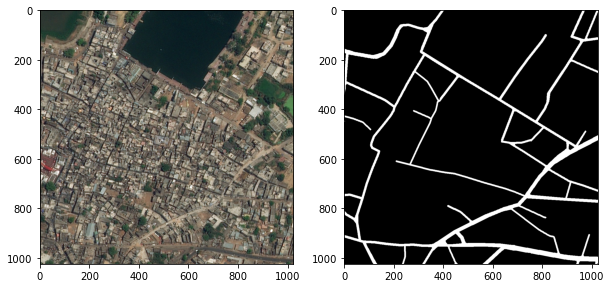

In [46]:
figure, axis = plt.subplots(1,2,figsize=(10,10))

axis[0].imshow(sat_image)
axis[1].imshow(sat_mask_image)

In [47]:
sat_image1 = cv2.cvtColor(cv2.imread(train_data['sat_image_path'][50]),
                         cv2.COLOR_BGR2RGB)

sat_mask_image1 = cv2.cvtColor(cv2.imread(train_data['mask_path'][50]),
                              cv2.COLOR_BGR2RGB)

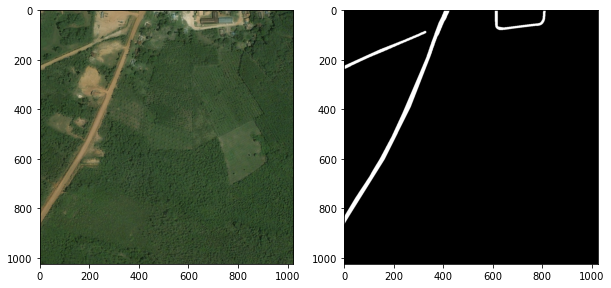

In [48]:
figure,axis = plt.subplots(1,2,figsize=(10,10))

axis[0].imshow(sat_image1)
axis[1].imshow(sat_mask_image1)

In [49]:
sat_image2 = cv2.cvtColor(cv2.imread(train_data['sat_image_path'][100]),
                         cv2.COLOR_BGR2RGB)

sat_mask_image2 = cv2.cvtColor(cv2.imread(train_data['mask_path'][100]),
                              cv2.COLOR_BGR2RGB)

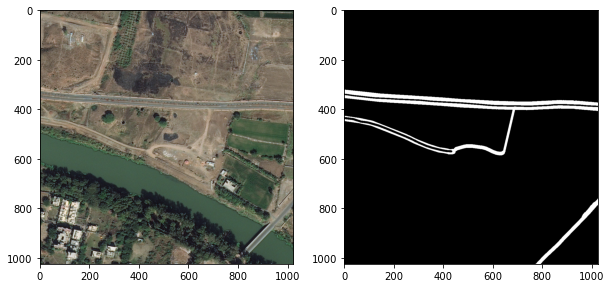

In [50]:
figure,axis = plt.subplots(1,2,figsize=(10,10))

axis[0].imshow(sat_image2)
axis[1].imshow(sat_mask_image2)

### Organize data for training

In [76]:
split_data = train_metadata[0:3000]

In [77]:
split_data.mask_path

0       ./satelliteRoads/train/285535_mask.png
1       ./satelliteRoads/train/748093_mask.png
2       ./satelliteRoads/train/703624_mask.png
3       ./satelliteRoads/train/621004_mask.png
4       ./satelliteRoads/train/860513_mask.png
                         ...                  
2995    ./satelliteRoads/train/470078_mask.png
2996    ./satelliteRoads/train/319322_mask.png
2997    ./satelliteRoads/train/951118_mask.png
2998    ./satelliteRoads/train/693141_mask.png
2999    ./satelliteRoads/train/947183_mask.png
Name: mask_path, Length: 3000, dtype: object

In [78]:
satellite_images = []
masked_images = []

In [79]:
for i in split_data.sat_image_path:
  sat = cv2.cvtColor(cv2.imread(i),cv2.COLOR_BGR2RGB)
  sat = cv2.resize(sat, (180,180))
  sat = sat/255
  satellite_images.append(sat)


In [80]:
for i in split_data.mask_path:
  masked = cv2.cvtColor(cv2.imread(i),cv2.COLOR_BGR2RGB)
  masked = cv2.resize(masked, (180,180))
  masked = masked/255
  masked_images.append(masked[:,:,0])

In [81]:
sat_images = np.array(satellite_images) 


In [82]:
mask_images = np.array(masked_images)

In [83]:
sat_images.shape


(3000, 180, 180, 3)

In [84]:
mask_images.shape

(3000, 180, 180)

### Model

In [90]:
input_dim = (sat_images.shape[1], sat_images.shape[2], sat_images.shape[3])
output_class=1

In [91]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, mode='min')
checkpoint_ = tf.keras.callbacks.ModelCheckpoint(monitor='val_accuracy',
                                                save_best_only=True,
                                                save_weights_only=True,
                                                filepath='./modelCheck')


In [92]:
encoder = Sequential()
encoder.add(Conv2D(32, (5,5), kernel_initializer='he_normal'))
encoder.add(ReLU())
encoder.add(Conv2D(64, (5,5), kernel_initializer='he_normal'))
encoder.add(ReLU())
encoder.add(Conv2D(128, (5,5), kernel_initializer='he_normal'))
encoder.add(ReLU())

In [93]:
decoderR = Sequential()
decoderR.add(Conv2DTranspose(64,(5,5)))
decoderR.add(ReLU())
decoderR.add(Conv2DTranspose(32,(5,5)))
decoderR.add(ReLU())
decoderR.add(Conv2DTranspose(1,(5,5)))
decoderR.add(ReLU())

In [94]:
autoEncoder = Sequential([encoder, decoderR])

In [95]:
autoEncoder.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [96]:
model = autoEncoder.fit(sat_images, mask_images, epochs=1,
                        callbacks=[stop_early, checkpoint_])



94/94 [==============================] - 1080s 11s/step - loss: 0.3208 - accuracy: 0.9439


In [97]:
predict = autoEncoder.predict(sat_images[:5])

1/1 [==============================] - 1s 700ms/step


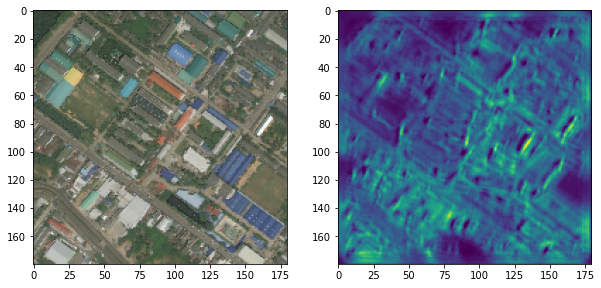

In [139]:
image0 = sat_images[0]
predicted_image0 = predict[0]

figure, axis = plt.subplots(1,2, figsize=(10,10))

axis[0].imshow(image0)
axis[1].imshow(predicted_image0)


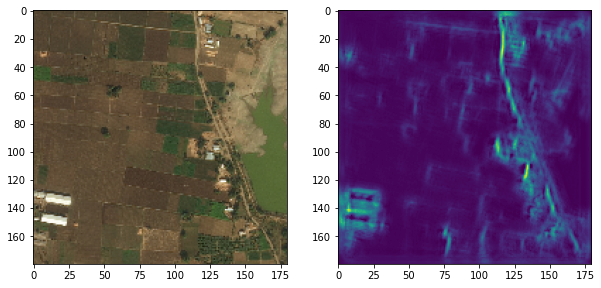

In [140]:
image0 = sat_images[1]
predicted_image0 = predict[1]

figure, axis = plt.subplots(1,2, figsize=(10,10))

axis[0].imshow(image0)
axis[1].imshow(predicted_image0)


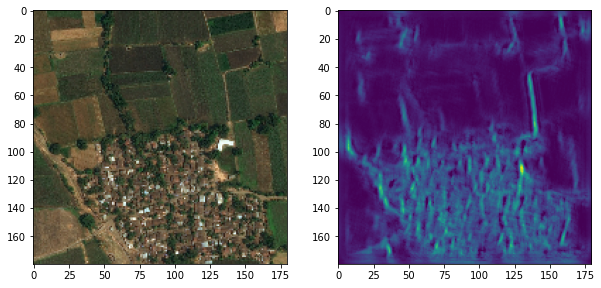

In [141]:
image0 = sat_images[2]
predicted_image0 = predict[2]

figure, axis = plt.subplots(1,2, figsize=(10,10))

axis[0].imshow(image0)
axis[1].imshow(predicted_image0)


In [109]:
val_data = validation_data[:20]



In [110]:
valsatellite_images = []
valmasked_images = []

In [111]:
for i in val_data.sat_image_path:
  vsat = cv2.cvtColor(cv2.imread(i),cv2.COLOR_BGR2RGB)
  vsat = cv2.resize(vsat, (180,180))
  vsat = vsat/255
  valsatellite_images.append(vsat)

In [112]:
for i in val_data.mask_path:
  vmasked = cv2.cvtColor(cv2.imread(i),cv2.COLOR_BGR2RGB)
  vmasked = cv2.resize(vmasked, (180,180))
  vmasked = vmasked/255
  valmasked_images.append(vmasked[:,:,0])

In [114]:
valsat_images = np.array(valsatellite_images)

In [115]:
valmasked_images = np.array(valmasked_images)

In [116]:
predict_validation = autoEncoder.predict(valsat_images[:5])

1/1 [==============================] - 1s 656ms/step


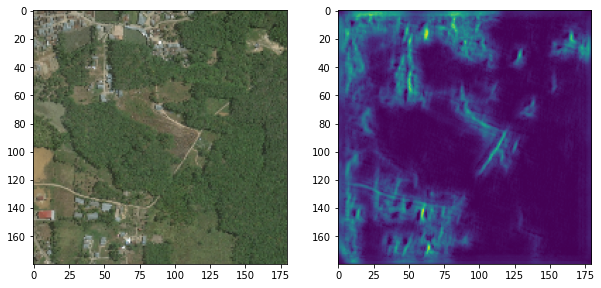

In [142]:
image0 = valsat_images[0]
predicted_image0 = predict_validation[0]

figure, axis = plt.subplots(1,2, figsize=(10,10))

axis[0].imshow(image0)
axis[1].imshow(predicted_image0)


In [129]:
test_data = test_metadata[:]

In [130]:
len(test_data)

1101

In [126]:
testsatellite_images = []

In [127]:
for i in test_data.sat_image_path:
  tsat = cv2.cvtColor(cv2.imread(i),cv2.COLOR_BGR2RGB)
  tsat = cv2.resize(tsat, (180,180))
  tsat = tsat/255
  testsatellite_images.append(tsat)

In [131]:
test_images = np.array(testsatellite_images)

In [132]:
predict_test = autoEncoder.predict(test_images[:5])

1/1 [==============================] - 1s 732ms/step


Original


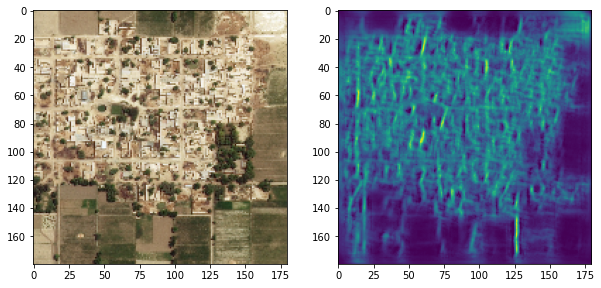

In [135]:
print('Original')
testimage0 = test_images[0]
predicted_image0 = predict_test[0]

figure, axis = plt.subplots(1,2, figsize=(10,10))

axis[0].imshow(testimage0)
axis[1].imshow(predicted_image0)


Original


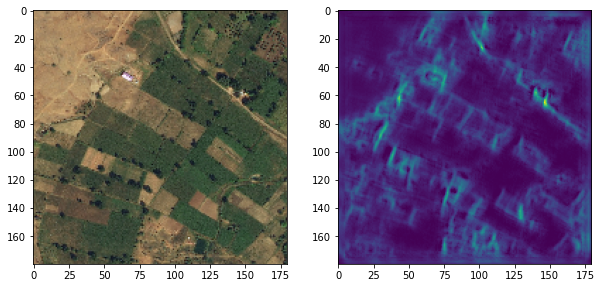

In [136]:
print('Original')
testimage1 = test_images[1]
predicted_image1 = predict_test[1]

figure, axis = plt.subplots(1,2, figsize=(10,10))

axis[0].imshow(testimage1)
axis[1].imshow(predicted_image1)
